# MPLID Dataset Exploration

This notebook provides an interactive exploration of the Membrane Protein-Lipid Interface Dataset (MPLID).

**Author**: Folorunsho Bright Omage  
**License**: MIT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Load Dataset

In [2]:
train = pd.read_csv('../data/processed/train_residues.csv.gz', compression='gzip')
val = pd.read_csv('../data/processed/val_residues.csv.gz', compression='gzip')
test = pd.read_csv('../data/processed/test_residues.csv.gz', compression='gzip')

print(f"Training samples: {len(train):,}")
print(f"Validation samples: {len(val):,}")
print(f"Test samples: {len(test):,}")
print(f"Total: {len(train) + len(val) + len(test):,}")

Training samples: 2,634,209Validation samples: 1,632,603Test samples: 867,430Total: 5,134,242

## 2. Class Distribution

In [3]:
splits = {'Train': train, 'Validation': val, 'Test': test}

for name, df in splits.items():
    n_contacts = df['is_contact'].sum()
    n_total = len(df)
    print(f"{name}: {n_contacts:,} contacts / {n_total:,} residues ({n_contacts/n_total:.2%})")

Train: 22,479 contacts / 2,634,209 residues (0.85%)Validation: 9,849 contacts / 1,632,603 residues (0.60%)Test: 6,107 contacts / 867,430 residues (0.70%)

## 3. Amino Acid Preferences

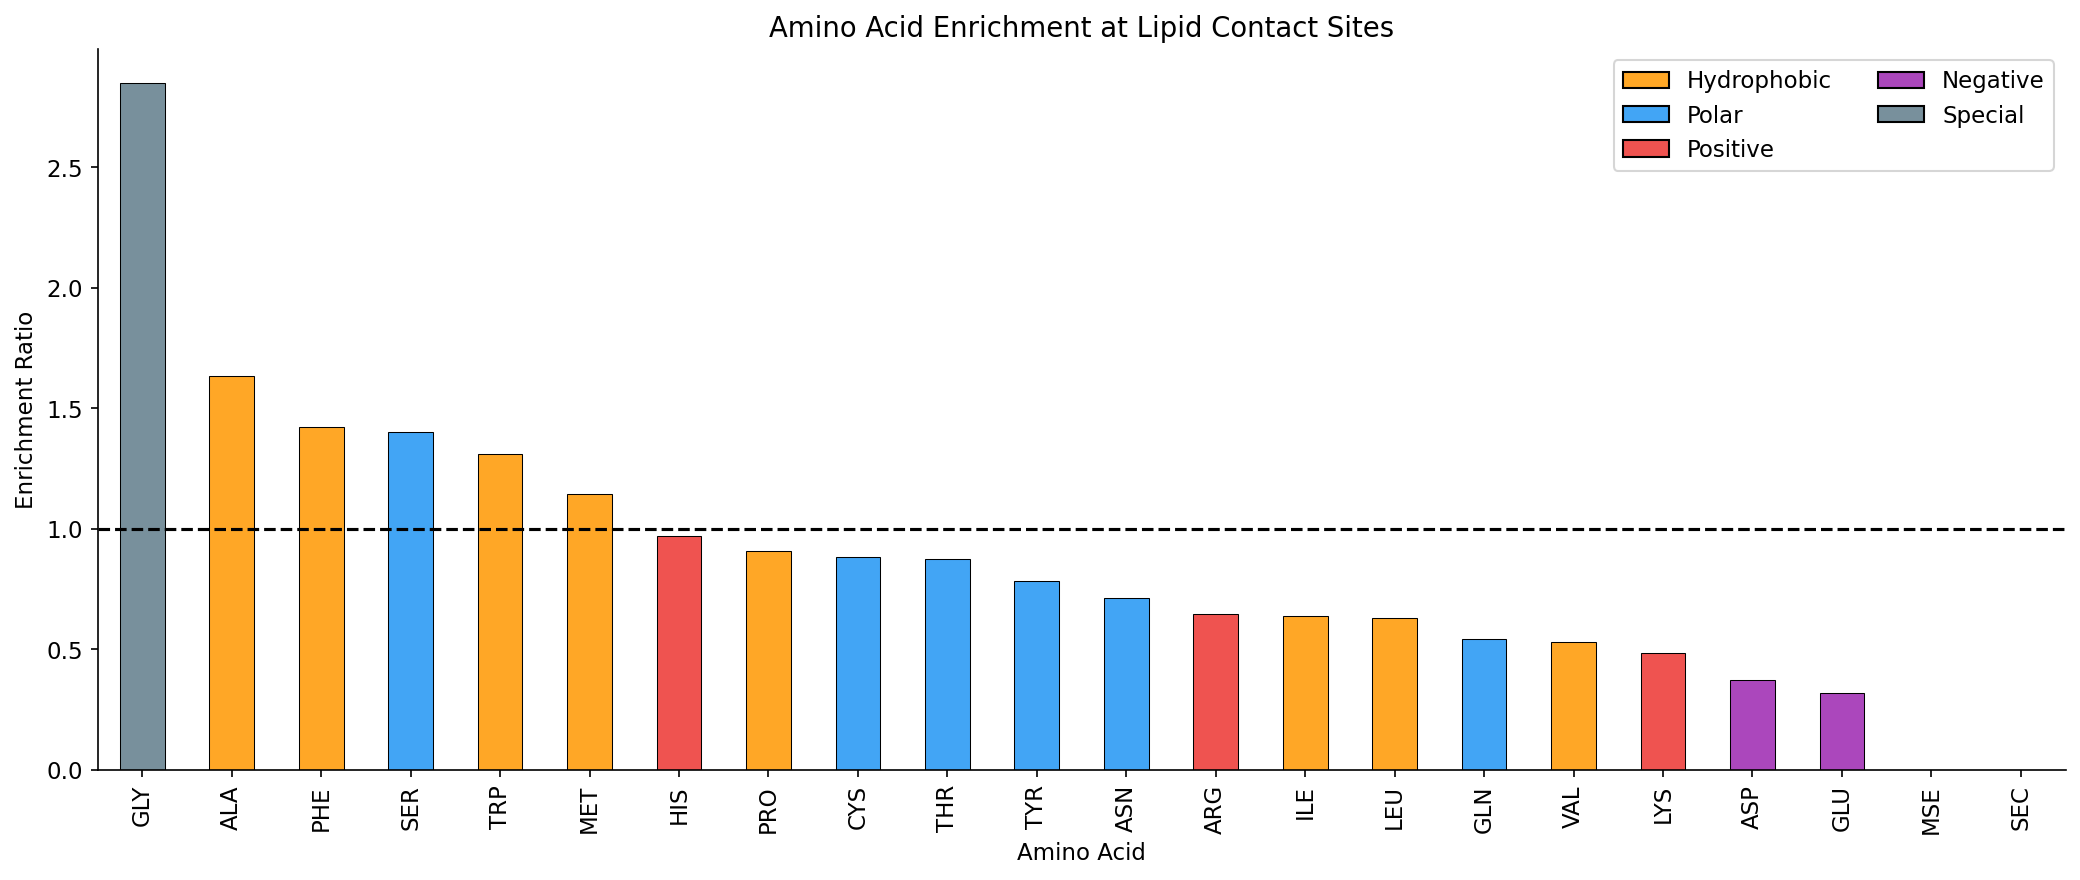

In [4]:
aa_contact = train[train['is_contact'] == True]['residue_name'].value_counts()
aa_total = train['residue_name'].value_counts()

enrichment = (aa_contact / aa_contact.sum()) / (aa_total / aa_total.sum())
enrichment = enrichment.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(14, 6))
colors = ['darkgreen' if v > 1 else 'darkred' for v in enrichment.values]
enrichment.plot(kind='bar', ax=ax, color=colors, edgecolor='black')
ax.axhline(y=1, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Amino Acid')
ax.set_ylabel('Enrichment Ratio')
ax.set_title('Amino Acid Enrichment at Lipid Contact Sites')
plt.tight_layout()
plt.show()

## 4. Distance Distribution

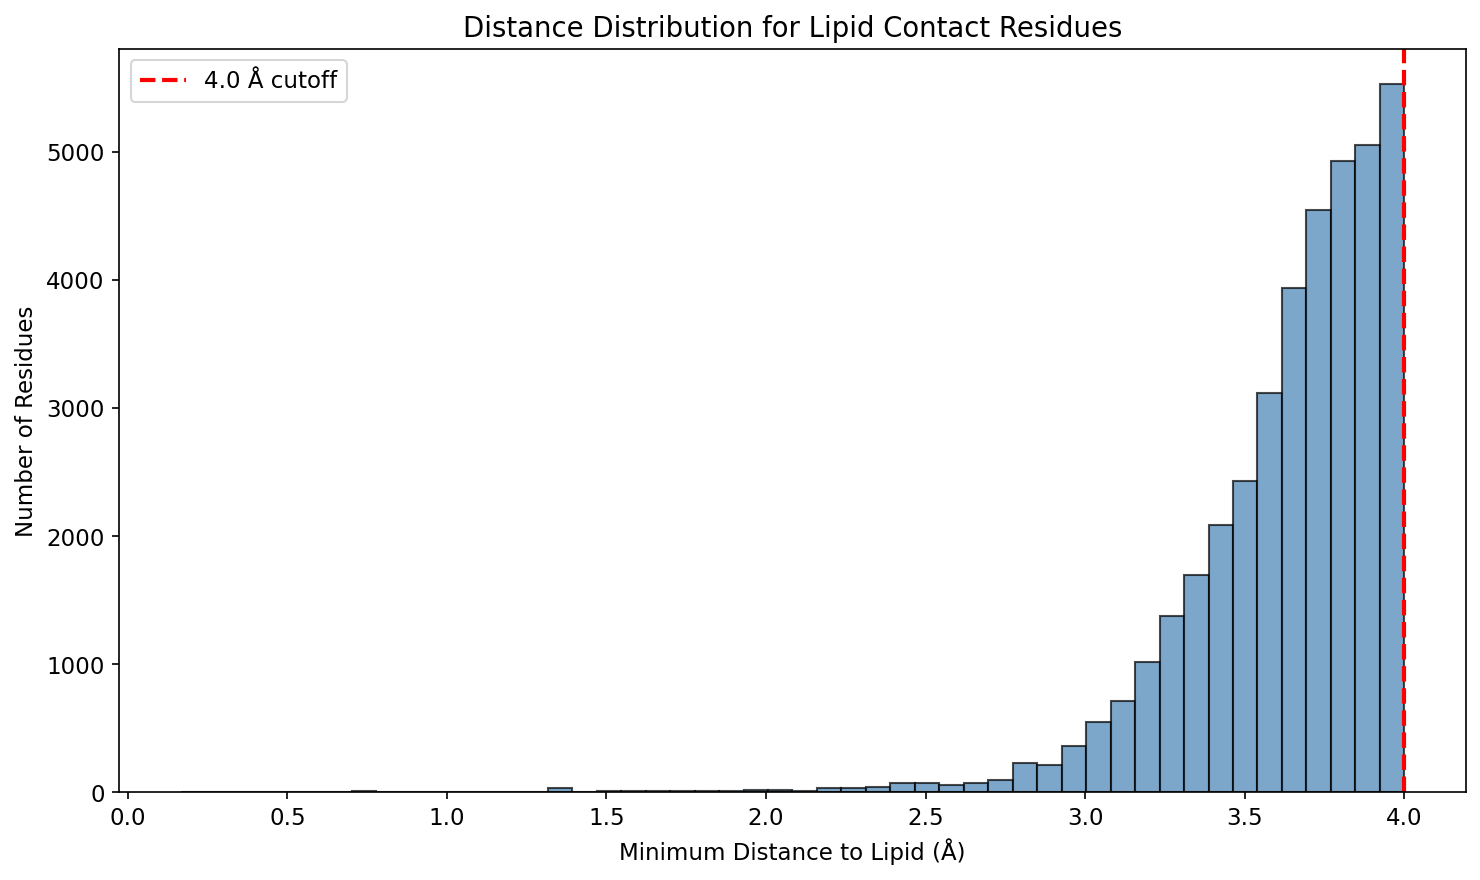

In [5]:
contacts = train[train['is_contact'] == True]
distances = contacts['min_distance'].dropna()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(distances, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.axvline(x=4.0, color='red', linestyle='--', linewidth=2, label='4.0 Å cutoff')
ax.set_xlabel('Minimum Distance to Lipid (Å)')
ax.set_ylabel('Number of Residues')
ax.set_title('Distance Distribution for Lipid Contact Residues')
ax.legend()
plt.tight_layout()
plt.show()

## 5. Protein Size Distribution

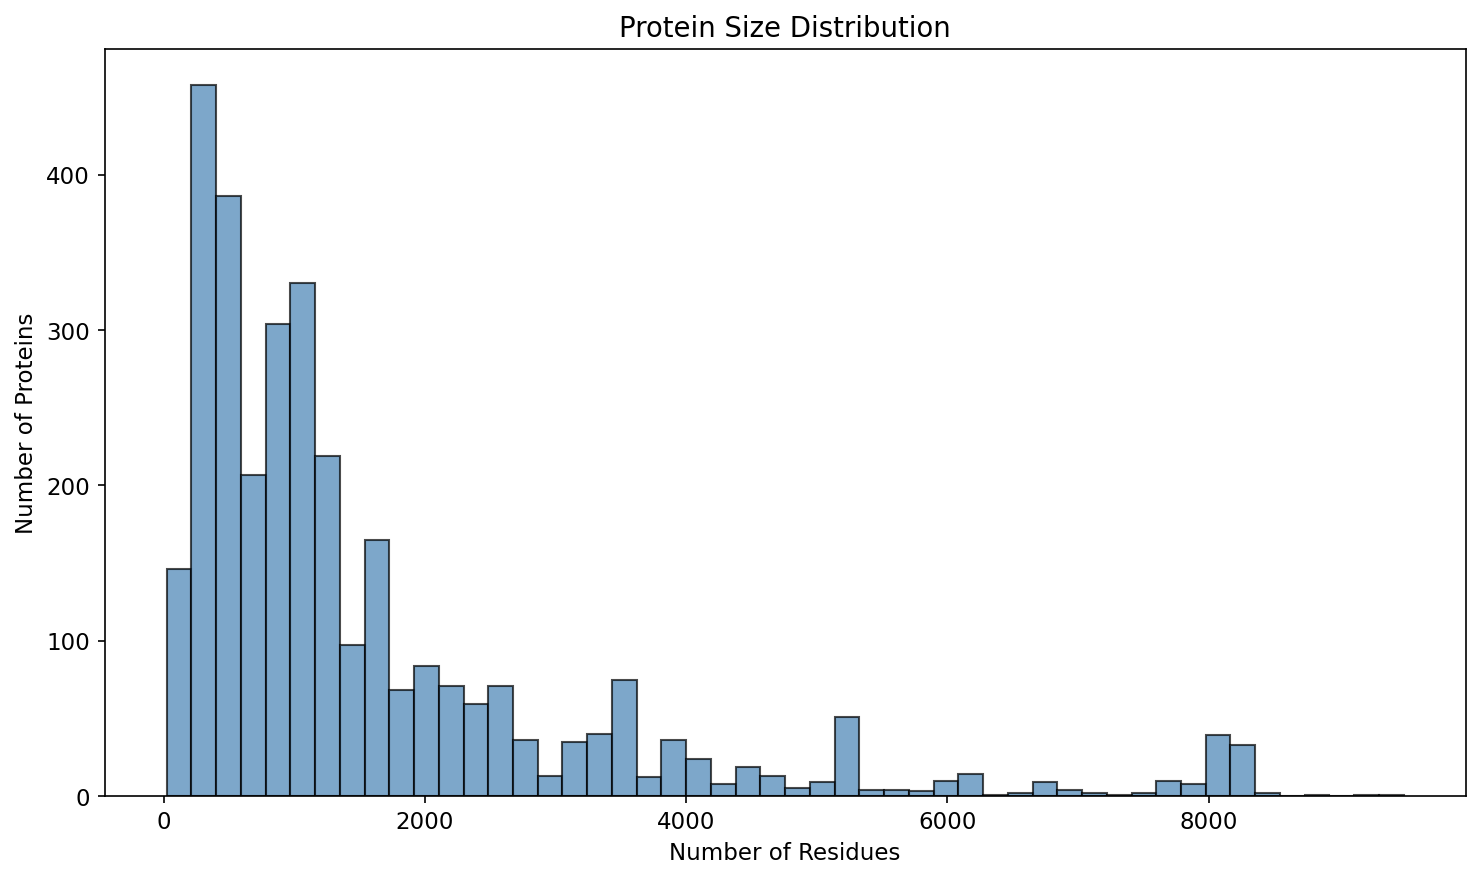

Median protein size: 1030 residuesMean protein size: 1608 residues

In [6]:
protein_sizes = train.groupby('pdb_id').size()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(protein_sizes, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Residues')
ax.set_ylabel('Number of Proteins')
ax.set_title('Protein Size Distribution')
plt.tight_layout()
plt.show()

print(f"Median protein size: {protein_sizes.median():.0f} residues")
print(f"Mean protein size: {protein_sizes.mean():.0f} residues")